Ces lignes des codes importent différentes bibliothèques et modules Python nécessaires pour effectuer des opérations d'analyse de données et de modélisation prédictive. Ces importations sont nécessaires pour utiliser les fonctionnalités fournies par ces bibliothèques et modules dans votre code Python ultérieur.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

ces instructions chargent un fichier de données, effectuent une analyse exploratoire des données en calculant des statistiques descriptives, en affichant un aperçu des données, en visualisant les distributions et en traçant une matrice de corrélation pour les variables numériques.

Shape du jeu de données : (149, 5)

Types de données :
 5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

Aperçu des données :
    5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

Résumé statistique des caractéristiques :
               5.1         3.5         1.4         0.2
count  149.000000  149.000000  149.000000  149.000000
mean     5.848322    3.051007    3.774497    1.205369
std      0.828594    0.433499    1.759651    0.761292
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.400000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

Distribution des classes :
 Iris-setosa
Iris-versic

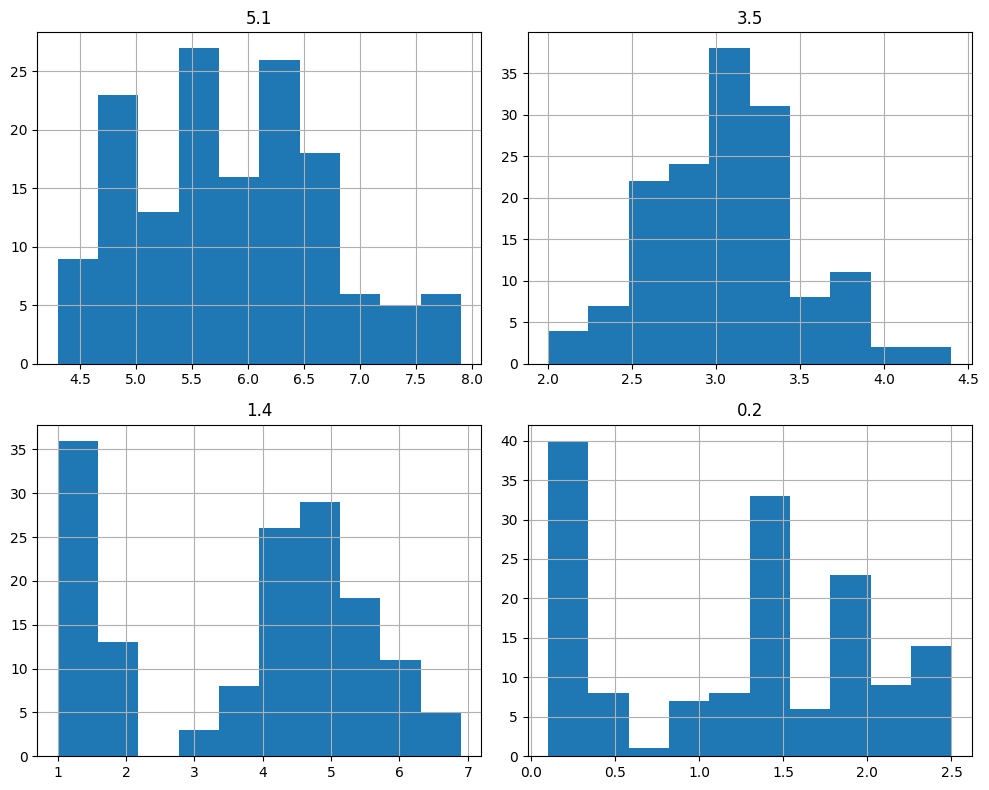

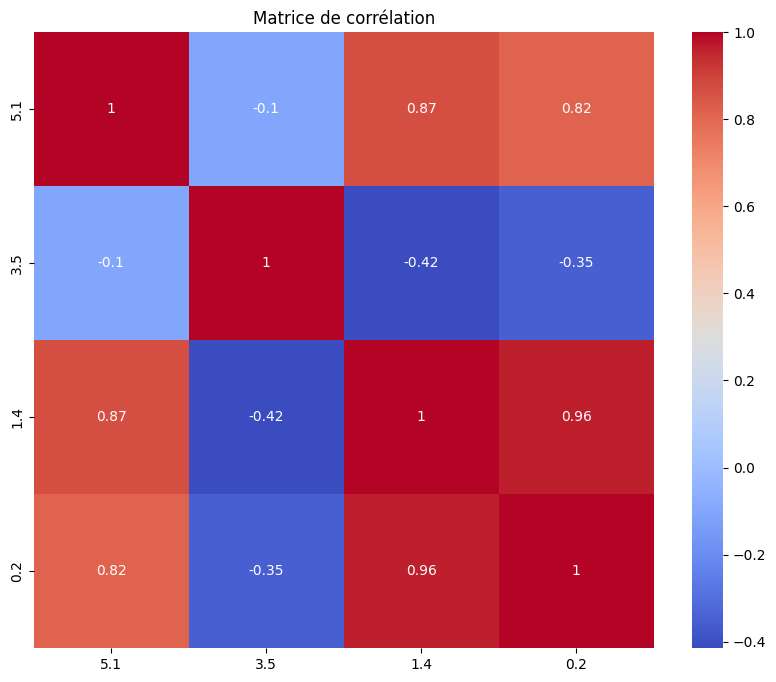

In [10]:
# Chargement du jeu de données
Pandasdata = pd.read_csv("iris.data")
# Analyse du jeu de données
print("Shape du jeu de données :", Pandasdata.shape)
print("\nTypes de données :\n", Pandasdata.dtypes)
print("\nAperçu des données :\n", Pandasdata.head())
print("\nRésumé statistique des caractéristiques :\n", Pandasdata.describe())
print("\nDistribution des classes :\n", Pandasdata['Iris-setosa'].value_counts())
# Visualisation des données avec des histogrammes
Pandasdata.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()
# Exclure la colonne "Iris-setosa"
numeric_data = Pandasdata.drop('Iris-setosa', axis=1)

# Visualisation des corrélations avec une matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

ces instructions divisent les données en ensembles d'entraînement et de test, créent plusieurs modèles de classification, évaluent leurs performances à l'aide de la validation croisée, sélectionnent le meilleur modèle en fonction de sa précision, entraînent ce meilleur modèle sur l'ensemble des données d'entraînement, et estiment sa précision sur les données du jeu de test.

In [11]:
# Diviser les données en jeux d'entraînement et de test
X = Pandasdata.drop('Iris-setosa', axis=1)  # Remplacez 'variable_de_classe' par le nom de votre variable de classe
y = Pandasdata['Iris-setosa']  # Remplacez 'variable_de_classe' par le nom de votre variable de classe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Définir les modèles
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier()
cart_model = DecisionTreeClassifier()
svm_model = SVC()
# Évaluer les modèles en utilisant une validation croisée à 10 folds
models = [logistic_model, knn_model, cart_model, svm_model]
model_names = ['Régression logistique', 'KNN', 'Arbre de décision', 'Machine à vecteurs de support']
for model, name in zip(models, model_names):    
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(f"Précision moyenne de {name} : {np.mean(scores)}")
# Sélectionner le meilleur modèle en fonction de sa précision
best_model = models[np.argmax(scores)]
best_model_name = model_names[np.argmax(scores)]
print(f"\nMeilleur modèle : {best_model_name}")
# Entraîner le meilleur modèle sur l'ensemble des données d'entraînement
best_model.fit(X_train, y_train)
# Estimer la précision du meilleur modèle sur les données du jeu de test
best_model_accuracy = best_model.score(X_test, y_test)
print(f"Précision du meilleur modèle sur le jeu de test : {best_model_accuracy}")

Précision moyenne de Régression logistique : 0.9916666666666666
Précision moyenne de KNN : 0.9825757575757574
Précision moyenne de Arbre de décision : 0.975
Précision moyenne de Machine à vecteurs de support : 0.975

Meilleur modèle : KNN
Précision du meilleur modèle sur le jeu de test : 0.9333333333333333


ces instructions standardisent les données d'entraînement et de test à l'aide du StandardScaler, effectuent une recherche des meilleurs paramètres pour chaque modèle à l'aide de la validation croisée et des grilles de recherche, entraînent les modèles avec les meilleurs paramètres trouvés, puis évaluent les modèles sur les données du jeu de test standardisées en calculant leur précision. Enfin, les précisions des modèles sont affichées.

In [12]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Définition des modèles avec les paramètres à ajuster
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier()
cart_model = DecisionTreeClassifier()
svm_model = SVC()
# Définition des grilles de recherche pour les paramètres
param_grid_logistic = {'C': [0.1, 1, 10]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_cart = {'max_depth': [None, 5, 10]}
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
# Recherche des meilleurs paramètres pour les modèles
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=10)
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=10)
grid_search_cart = GridSearchCV(cart_model, param_grid_cart, cv=10)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=10)
# Entraînement des modèles avec les meilleurs paramètres
grid_search_logistic.fit(X_train_scaled, y_train)
grid_search_knn.fit(X_train_scaled, y_train)
grid_search_cart.fit(X_train_scaled, y_train)
grid_search_svm.fit(X_train_scaled, y_train)
# Évaluation des modèles sur les données du jeu de test
logistic_accuracy = grid_search_logistic.score(X_test_scaled, y_test)
knn_accuracy = grid_search_knn.score(X_test_scaled, y_test)
cart_accuracy = grid_search_cart.score(X_test_scaled, y_test)
svm_accuracy = grid_search_svm.score(X_test_scaled, y_test)
# Affichage des précisions des modèles
print(f"Précision du modèle de régression logistique sur le jeu de test : {logistic_accuracy}")
print(f"Précision du modèle KNN sur le jeu de test : {knn_accuracy}")
print(f"Précision du modèle d'Arbre de décision sur le jeu de test : {cart_accuracy}")
print(f"Précision du modèle de Machine à vecteurs de support sur le jeu de test : {svm_accuracy}")

Précision du modèle de régression logistique sur le jeu de test : 0.9
Précision du modèle KNN sur le jeu de test : 0.9333333333333333
Précision du modèle d'Arbre de décision sur le jeu de test : 0.9
Précision du modèle de Machine à vecteurs de support sur le jeu de test : 0.9333333333333333


Ces nouvelles instructions mettent à jour les grilles de recherche des paramètres pour les modèles KNN et d'Arbre de décision, effectuent une nouvelle recherche des meilleurs paramètres, entraînent les modèles avec les nouveaux meilleurs paramètres trouvés, évaluent les modèles ajustés sur les données du jeu de test standardisées et affichent les précisions des modèles ajustés.

In [13]:
# Modèles à ajuster avec les paramètres
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_cart = {'max_depth': [None, 5, 10, 15]}
# Recherche des meilleurs paramètres pour les modèles
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=10)
grid_search_cart = GridSearchCV(cart_model, param_grid_cart, cv=10)
# Entraînement des modèles avec les meilleurs paramètres
grid_search_knn.fit(X_train_scaled, y_train)
grid_search_cart.fit(X_train_scaled, y_train)
# Évaluation des modèles ajustés sur les données du jeu de test
knn_accuracy = grid_search_knn.score(X_test_scaled, y_test)
cart_accuracy = grid_search_cart.score(X_test_scaled, y_test)
# Affichage des précisions des modèles ajustés
print(f"Précision du modèle KNN ajusté sur le jeu de test : {knn_accuracy}")
print(f"Précision du modèle d'Arbre de décision ajusté sur le jeu de test : {cart_accuracy}")

Précision du modèle KNN ajusté sur le jeu de test : 0.9333333333333333
Précision du modèle d'Arbre de décision ajusté sur le jeu de test : 0.9


Ces instructions définissent les modèles d'ensemble (AdaBoost, Gradient Boosting et Random Forest), effectuent une validation croisée à 10 folds sur les données d'entraînement pour évaluer les performances des modèles d'ensemble et affichent les précisions moyennes des modèles d'ensemble. Notez que dans cette partie, les données d'entraînement non standardisées X_train sont utilisées pour évaluer les modèles d'ensemble.

In [14]:
# Définition des modèles d'ensemble
adaboost_model = AdaBoostClassifier()
gradient_boosting_model = GradientBoostingClassifier()
random_forest_model = RandomForestClassifier()
# Évaluation des modèles d'ensemble à l'aide d'une validation croisée à 10 folds
ensemble_models = [adaboost_model, gradient_boosting_model, random_forest_model]
ensemble_model_names = ['AdaBoost', 'Gradient Boosting', 'Random Forest']
for model, name in zip(ensemble_models, ensemble_model_names):    
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(f"Précision moyenne de {name} : {np.mean(scores)}")

C:\Users\mardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

Précision moyenne de AdaBoost : 1.0
Précision moyenne de Gradient Boosting : 0.9833333333333332
Précision moyenne de Random Forest : 0.9833333333333332


Ces instructions standardisent les données d'entraînement et de test si nécessaire, entraînent le meilleur modèle sur l'ensemble du jeu de données d'entraînement standardisé, effectuent des prédictions sur l'ensemble de test standardisé, évaluent les prédictions en calculant la précision du modèle sur l'ensemble de test et affichent la précision du meilleur modèle sur l'ensemble de test.

In [15]:
# Standardisation des données si nécessaires
caler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Entraînement du meilleur modèle sur l'ensemble du jeu de données d'entraînement
best_model.fit(X_train_scaled, y_train)
# Prédictions sur l'ensemble de test
predictions = best_model.predict(X_test_scaled)
# Évaluation des prédictions
accuracy = best_model.score(X_test_scaled, y_test)
print(f"Précision du meilleur modèle sur l'ensemble de test : {accuracy}")

Précision du meilleur modèle sur l'ensemble de test : 0.9333333333333333
